In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("DataSet\PlacementTrain.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mahta\AppData\Local\Temp\ipykernel_26932\3329670257.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("DataSet\PlacementTrain.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

In [4]:
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [5]:
df.describe()

,Student_ID,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,24977.962600,20.999333,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133
std,14425.605704,1.995071,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954
min,1.000000,18.000000,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000
25%,12509.750000,19.000000,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000
50%,24957.500000,21.000000,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000
75%,37475.250000,23.000000,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000
max,50000.000000,24.000000,9.800000,3.000000,6.000000,10.000000,10.000000,100.000000,10.000000,3.000000,3.000000


In [6]:
df['Placement_Status'].value_counts()

Placement_Status
Not Placed    28688
Placed        16312
Name: count, dtype: int64

In [7]:
df["Academic_Strength"] = df["CGPA"] * df["Aptitude_Test_Score"] / 100

In [8]:
df["Experience_Score"] = df["Internships"]*2 + df["Projects"]

In [9]:
df["Skill_Power"] = (df["Coding_Skills"] + df["Communication_Skills"] + df["Soft_Skills_Rating"]) / 3

In [10]:
df["Risk_Score"] = df["Backlogs"] / (df["CGPA"] + 0.1)

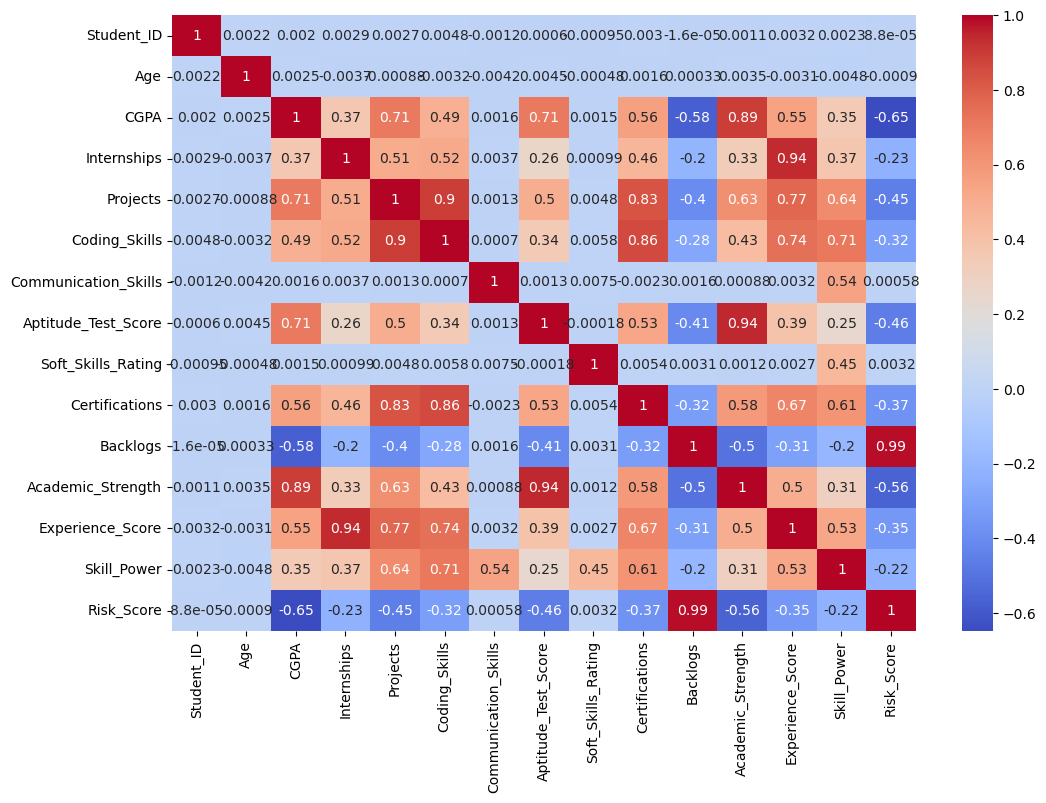

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


In [12]:
df_model = df.drop(columns=[
    "Student_ID","Age","CGPA","Internships","Projects",
    "Coding_Skills","Communication_Skills","Aptitude_Test_Score",
    "Soft_Skills_Rating","Certifications","Backlogs"
])


In [13]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             45000 non-null  object 
 1   Degree             45000 non-null  object 
 2   Branch             45000 non-null  object 
 3   Placement_Status   45000 non-null  object 
 4   Academic_Strength  45000 non-null  float64
 5   Experience_Score   45000 non-null  int64  
 6   Skill_Power        45000 non-null  float64
 7   Risk_Score         45000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.7+ MB


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ["Gender","Degree","Branch","Placement_Status"]:
    df_model[col] = le.fit_transform(df_model[col])

In [15]:
X = df_model.drop("Placement_Status", axis=1)
y = df_model["Placement_Status"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.5,
    reg_lambda=1
)

xgb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print("Tuned XGB:", accuracy_score(y_test, xgb.predict(X_test)))


Tuned XGB: 0.8862222222222222


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5709
           1       0.82      0.88      0.85      3291

    accuracy                           0.89      9000
   macro avg       0.87      0.88      0.88      9000
weighted avg       0.89      0.89      0.89      9000



In [19]:
test = pd.read_csv("DataSet\PlacementTest.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mahta\AppData\Local\Temp\ipykernel_26932\14725143.py:1: SyntaxWarning: invalid escape sequence '\P'
  test = pd.read_csv("DataSet\PlacementTest.csv")


In [20]:
test["Skill_Power"] = (test["Coding_Skills"] + test["Communication_Skills"] + test["Soft_Skills_Rating"]) / 3
test["Experience_Score"] = test["Internships"]*2 + test["Projects"]
test["Academic_Strength"] = test["CGPA"] * test["Aptitude_Test_Score"] / 100
test["Risk_Score"] = test["Backlogs"] / (test["CGPA"] + 0.1)

In [21]:

test_model = test.drop(columns=[
    "Student_ID","Age","CGPA","Internships","Projects",
    "Coding_Skills","Communication_Skills","Aptitude_Test_Score",
    "Soft_Skills_Rating","Certifications","Backlogs"
])

In [22]:
for col in ["Gender","Degree","Branch"]:
    test_model[col] = le.fit_transform(test_model[col])

In [23]:
test_model = test_model[[
    "Gender","Degree","Branch",
    "Academic_Strength","Experience_Score","Skill_Power","Risk_Score"
]]


In [24]:
# Predict
test["Predicted"] = xgb.predict(test_model)


In [25]:
test["True"] = test["Placement_Status"].map({"Not Placed":0, "Placed":1})

In [26]:

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(test["True"], test["Predicted"]))

Test Accuracy: 0.89
